In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("1_str_indices_data.csv")

In [4]:
data.head()

,Unnamed: 0,ID,运算类型,基表,属性,字符
0,0,Q1-MV1,0,0,3,"[0, 1, 1, 12, 2, 3, 12, 2, 3, 4]"
1,1,Q1-MV2,0,0,3,"[0, 1, 1, 12, 2, 3, 12, 2, 3, 4]"
2,2,Q1-MV2,5,0,13,[]
3,3,Q1-MV3,0,0,3,"[0, 1, 1, 12, 2, 3, 12, 2, 3, 4]"
4,4,Q1-MV3,5,0,13,[]


In [5]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10, 6, input_length=7))#len(word2idx)

In [6]:
L = []
data.运算类型.map(lambda x:L.append(x))
input_array = np.array(L)
model.compile('rmsprop', 'mse')
yunsuanleixing = model.predict(input_array)


In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(19, 6, input_length=7))#len(word2idx)
L = []
data.基表.map(lambda x:L.append(x))
input_array = np.array(L)
model.compile('rmsprop', 'mse')
jibiao = model.predict(input_array)

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(20, 6, input_length=7))#len(word2idx)
L = []
data.属性.map(lambda x:L.append(x))
input_array = np.array(L)
model.compile('rmsprop', 'mse')
shuxing = model.predict(input_array)

In [9]:
import re
L = []
def strToList(x):
  l = re.findall(r"\d+\.?\d*",x)
  l2 = []
  for i in l:
    l2.append(int(i))
  return l2
def Append(x):
  if len(x):
      for i in x:
        L.append(i)
  return x
data.字符.map(lambda x:strToList(x)).map(lambda x:Append(x))

0      [0, 1, 1, 12, 2, 3, 12, 2, 3, 4]
1      [0, 1, 1, 12, 2, 3, 12, 2, 3, 4]
2                                    []
3      [0, 1, 1, 12, 2, 3, 12, 2, 3, 4]
4                                    []
                     ...               
181                                 [8]
182                                  []
183                                  []
184                                  []
185                                  []
Name: 字符, Length: 186, dtype: object

In [10]:
np.max(np.array(L))

24

In [11]:
data.字符 = data.字符.map(lambda x:strToList(x))

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(25, 6, input_length=7))#len(word2idx)

def Embedding(x):
  if(len(x)==0):
    return []
  input_array = np.array(x)
  model.compile('rmsprop', 'mse')
  output = model.predict(input_array)
  return output

data.zifu = data.字符.map(lambda x:Embedding(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [13]:
L = []
l = []
for i in range(data.zifu.shape[0]):
  l = []
  for j in data.zifu[i]:
    l.append(j[0])
  L.append(l)

In [14]:
np.array(L[0]).shape

(10, 6)

In [15]:
from tensorflow.keras import layers, Model

In [16]:
import torch
import torch.nn as nn
from collections import OrderedDict

def ConvBatchRelu(x):
  if(len(x)==0):
    return np.array([])
  Len = np.array(x).shape[0]
  Ten = torch.from_numpy(np.array([[x]]))
  model = nn.Sequential(
      nn.Conv2d(1,1,(Len,1)),
      nn.BatchNorm2d(1,affine=True),
      nn.ReLU()
      )
  
  output = model(torch.from_numpy(np.array([[x]])))
  return output.detach().numpy()

cNN = []
for i in range(len(L)):
  temp = ConvBatchRelu(L[i])
  cNN.append(temp)

In [17]:
np.array(cNN).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(186,)

In [18]:
#data = data.drop(columns = ['cNN'])
data = pd.concat([data,pd.DataFrame(cNN)],axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [19]:
colName = data.columns

In [20]:
data.columns = ['Unnamed: 0', 'ID', '运算类型', '基表', '属性', '字符', 'cNN']

In [21]:
data

,Unnamed: 0,ID,运算类型,基表,属性,字符,cNN
0,0,Q1-MV1,0,0,3,"[0, 1, 1, 12, 2, 3, 12, 2, 3, 4]",[[[[0. 0. 0.21901049 0.647052 ...
1,1,Q1-MV2,0,0,3,"[0, 1, 1, 12, 2, 3, 12, 2, 3, 4]",[[[[0.20783001 1.7708856 0. 0. ...
2,2,Q1-MV2,5,0,13,[],[]
3,3,Q1-MV3,0,0,3,"[0, 1, 1, 12, 2, 3, 12, 2, 3, 4]",[[[[1.669436 0. 0. 0. ...
4,4,Q1-MV3,5,0,13,[],[]
...,...,...,...,...,...,...,...
181,181,Q10-MV10,0,0,11,[8],[[[[0.14091764 0. 0. 0.1348611...
182,182,Q10-MV10,2,5,4,[],[]
183,183,Q10-MV10,5,17,16,[],[]
184,184,Q10-MV10,6,0,12,[],[]


In [22]:
#from pandas.io.common import is_fsspec_url
union = []
def judgeNone(x,union):
  if(len(x)==0):
    union += [0,0,0,0,0,0]
  union += x[0].tolist()
  return 0
for i in range(186):
  l = []
  for j in [yunsuanleixing,jibiao,shuxing]:
    judgeNone(j[i],l)

  if (len(cNN[i])==0):
    l += [0,0,0,0,0,0]
  else:
    l += cNN[i][0][0][0].tolist()  
  union.append([l])

In [23]:
lstm=torch.nn.LSTM(input_size=24,hidden_size=6,num_layers=2,
                        bias=True,batch_first=False,dropout=0.5,bidirectional=False)
input_data = np.array(union)
input_data=torch.from_numpy(input_data).to(torch.float32)
h0 = torch.randn(2, 1, 6)
c0 = torch.randn(2, 1, 6)
output, (hn, cn)=lstm(input_data, (h0, c0))

In [24]:
output.detach().numpy()

array([[[-4.2423648e-01,  3.6614612e-01,  2.3659326e-01, -5.6016508e-02,
          7.2976929e-01, -2.0304592e-02]],

       [[-4.6527550e-02,  9.5546834e-02,  3.4480993e-04, -1.5038543e-02,
          4.4497046e-01,  2.0719925e-02]],

       [[ 7.6376903e-03,  6.2451554e-03, -8.0329955e-02, -1.3697314e-02,
          2.8263098e-01,  3.7651505e-02]],

       ...,

       [[-8.0036834e-02, -1.2142906e-01, -1.7468880e-01,  2.8076856e-03,
         -1.6654468e-01, -7.0104912e-02]],

       [[-9.6425086e-02, -1.2766740e-01, -1.7110990e-01,  1.5949891e-03,
         -1.9217508e-01, -7.8806318e-02]],

       [[-4.8058439e-02, -8.5671656e-02, -1.7376687e-01,  2.9075729e-02,
         -1.5381408e-01, -4.1593321e-02]]], dtype=float32)

In [25]:
temp = []
for i in output.detach().numpy():
  temp.append(list(i)[0])
new = pd.concat([data,pd.DataFrame(np.array(temp))],axis=1)[['ID',0,1,2,3,4,5]]

In [26]:
from collections import Counter

L = []
new.ID.map(lambda x:L.append(x))
Id = dict(Counter(L).most_common(len(L) - 1))
idx2word = [word for word in Id.keys()]

In [27]:
idx2word

['Q5-MV10',
 'Q5-MV9',
 'Q5-MV8',
 'Q10-MV10',
 'Q10-MV9',
 'Q5-MV6',
 'Q10-MV8',
 'Q3-MV8',
 'Q10-MV7',
 'Q3-MV7',
 'Q3-MV6',
 'Q5-MV4',
 'Q3-MV5',
 'Q10-MV5',
 'Q5-MV2',
 'Q3-MV4',
 'Q10-MV3',
 'Q1-MV3',
 'Q5-MV1',
 'Q1-MV2',
 'Q6-MV2',
 'Q1-MV1',
 'Q3-MV1',
 'Q3-MV2',
 'Q3-MV3',
 'Q5-MV3',
 'Q5-MV5',
 'Q5-MV7',
 'Q6-MV1',
 'Q10-MV1',
 'Q10-MV2',
 'Q10-MV4',
 'Q10-MV6']

In [28]:
last = []
for i in idx2word:
  temp = []
  temp_table = new[new.ID == i]
  for index, row in temp_table.iterrows():
    
    for j in range(6):
      temp += [row[j]]
  if (len(temp_table)<16):
    temp += [0 for k in range(6*(16-len(temp_table)))]
  last.append([temp])

In [29]:
lstm=torch.nn.LSTM(input_size=96,hidden_size=6,num_layers=2,
                        bias=True,batch_first=False,dropout=0.5,bidirectional=False)
input_data = np.array(last)
input_data=torch.from_numpy(input_data).to(torch.float32)
h0 = torch.randn(2, 1, 6)
c0 = torch.randn(2, 1, 6)
last_output, (hn, cn)=lstm(input_data, (h0, c0))

In [30]:
Data = data.copy()
Data = Data.drop(columns = ['cNN'])
L = []
l1 = list(Data.ID)
l2 = []
[l2.append(i) for i in l1 if not i in l2]
for i in l2:
  j = 0
  for _ in idx2word:
    if(i == _):
      for k in range(len(Data[Data.ID == i])):
        L.append(last_output[j])
    j += 1

In [31]:
Data = pd.concat([Data,pd.DataFrame(L)],axis=1)

In [32]:
Data.columns

Index(['Unnamed: 0', 'ID', '运算类型', '基表', '属性', '字符', 0], dtype='object')

In [33]:
Data.columns = ['Unnamed: 0', 'ID', '运算类型', '基表', '属性', '字符', 'last']

In [34]:
Data['last'] = Data['last'].map(lambda x:x.detach().numpy())

In [35]:
Data = Data.drop(columns = ['Unnamed: 0'])

In [36]:
xlsx = pd.read_excel("data.xlsx")

In [38]:
xlsx.head()

,id,labels,sto_tab,num_tab,num_att,exe_pla,tab,att,type
0,1,1,1712,1,16,Q1-MV1,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12..."
1,2,1,1712,1,16,Q1-MV1,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12..."
2,3,1,2583,1,16,Q1-MV1,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12..."
3,4,3,3477,1,16,Q1-MV1,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12..."
4,5,2,4355,1,16,Q1-MV1,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12..."


In [40]:
#xlsx = xlsx.drop(columns = ['Unnamed: 0'])

In [41]:
xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10032 non-null  int64 
 1   labels   10032 non-null  int64 
 2   sto_tab  10032 non-null  int64 
 3   num_tab  10032 non-null  int64 
 4   num_att  10032 non-null  int64 
 5   exe_pla  10032 non-null  object
 6   tab      10032 non-null  object
 7   att      10032 non-null  object
 8   type     10032 non-null  object
dtypes: int64(5), object(4)
memory usage: 705.5+ KB


In [42]:
Data = xlsx.copy()
L = []
l1 = list(Data.exe_pla)
l2 = []
[l2.append(i) for i in l1 if not i in l2]
for i in l2:
  j = 0
  for _ in idx2word:
    if(i == _):
      for k in range(len(Data[Data.exe_pla == i])):
        L.append(last_output[j])
    j += 1
Data = pd.concat([Data,pd.DataFrame(L)],axis=1)


In [43]:
Data.columns



Index([     'id',  'labels', 'sto_tab', 'num_tab', 'num_att', 'exe_pla',
           'tab',     'att',    'type',         0],
      dtype='object')

In [44]:
Data = Data.drop(columns = ['exe_pla'])
Data.columns = [     'id',  'labels', 'sto_tab', 'num_tab', 'num_att','tab',     'att',    'type',          'exe_pla']

In [45]:
Data.head()

,id,labels,sto_tab,num_tab,num_att,tab,att,type,exe_pla
0,1,1,1712,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[tensor(0.0310, grad_fn=<UnbindBackward>), te..."
1,2,1,1712,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[tensor(0.0310, grad_fn=<UnbindBackward>), te..."
2,3,1,2583,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[tensor(0.0310, grad_fn=<UnbindBackward>), te..."
3,4,3,3477,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[tensor(0.0310, grad_fn=<UnbindBackward>), te..."
4,5,2,4355,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[tensor(0.0310, grad_fn=<UnbindBackward>), te..."


In [46]:
Data['exe_pla'] = Data['exe_pla'].map(lambda x:x.detach().numpy())

In [50]:
Data.head()

,id,labels,sto_tab,num_tab,num_att,tab,att,type,exe_pla
0,1,1,1712,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[0.030994428, 0.30075803, 0.06678055, -0.0609..."
1,2,1,1712,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[0.030994428, 0.30075803, 0.06678055, -0.0609..."
2,3,1,2583,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[0.030994428, 0.30075803, 0.06678055, -0.0609..."
3,4,3,3477,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[0.030994428, 0.30075803, 0.06678055, -0.0609..."
4,5,2,4355,1,16,lineitem,l_orderkey+l_partkey+l_suppkey+l_linenumber+l_...,"bigint+int+int+bigint+decimal(12,2)+decimal(12...","[[0.030994428, 0.30075803, 0.06678055, -0.0609..."


In [48]:
Data.to_csv("Data_last.csv")

In [49]:
#ls

1_str_indices_data.csv  Data_last.csv  data.xlsx  sample_data/


# model

## 数据预处理

In [51]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
data = pd.read_csv("Data_last.csv")
data = data.drop(columns = 'Unnamed: 0')
import re
L = []
def strToList(x):
  l = re.findall(r"\d+\.?\d*",x)
  l2 = []
  for i in l:
    l2.append(i)
  return l2
def Append(x):
  if len(x):
      for i in x:
        L.append(i)
  return x
data.exe_pla = data.exe_pla.map(lambda x:strToList(x)).map(lambda x:Append(x))

In [53]:
tmp = data['exe_pla'].apply(pd.Series,index=['exe_pla_0','exe_pla_1','exe_pla_2','exe_pla_3','exe_pla_4','exe_pla_5'])

In [54]:
data = pd.concat([data,tmp],axis = 1)

In [55]:
from sklearn.model_selection import train_test_split

# 30%用于测试集，70%用于训练集
X_train,X_test,y_train,y_test= train_test_split(data.drop(columns = 'labels'),data.labels,test_size=0.3,random_state=0)

In [56]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [57]:
train.to_csv('train.csv')
test.to_csv('test.csv')

_CSV_COLUMN_DEFAULTS = [[1.00], [''], ['']]
eps = 1e-4
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
for i in range(6):
  df_train['exe_pla_'+str(i)] = df_train['exe_pla_'+str(i)].map(lambda x:int(100*x))
  df_test['exe_pla_'+str(i)] = df_test['exe_pla_'+str(i)].map(lambda x:int(100*x))

df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')

In [58]:
train_data_file = "df_train.csv"
test_data_file = "df_test.csv"

TARGET_FEATURE_NAME = "labels"
TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

NUMERIC_FEATURE_NAMES = [
    "num_tab",
    "num_att",
    "sto_tab",
    "exe_pla_0",
    "exe_pla_1",
    "exe_pla_2",
    "exe_pla_3",
    "exe_pla_4",
    "exe_pla_5"


]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "tab": list(df_train["tab"].unique()),
    "att": list(df_train["att"].unique()),
    "type":list(df_train["type"].unique()),
}

CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

CSV_HEADER = FEATURE_NAMES + [TARGET_FEATURE_NAME]

COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

In [59]:
df_train = df_train[CSV_HEADER]
df_train.to_csv(train_data_file, index=False)
df_test = df_test[CSV_HEADER]
df_test.to_csv(test_data_file, index=False)

In [60]:
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):

    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=True,
        shuffle=shuffle,
    )
    return dataset.cache()


## 模型函数

In [61]:
learning_rate = 0.001
dropout_rate = 0.1
batch_size = 265
num_epochs = 50

hidden_units = [32, 32]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

    test_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    _, accuracy = model.evaluate(test_dataset, verbose=0)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")


In [62]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float64
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs


In [63]:

from tensorflow.keras.layers import StringLookup


def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int" if use_embedding else "binary",
            )
            if use_embedding:
                # Convert the string input values into integer indices.
                encoded_feature = lookup(inputs[feature_name])
                embedding_dims = int(math.sqrt(len(vocabulary)))
                # Create an embedding layer with the specified dimensions.
                embedding = layers.Embedding(
                    input_dim=len(vocabulary), output_dim=embedding_dims
                )
                # Convert the index values to embedding representations.
                encoded_feature = embedding(encoded_feature)

            else:
                # Convert the string input values into a one hot encoding.
                encoded_feature = lookup(tf.expand_dims(inputs[feature_name], -1))
        else:
            # Use the numerical features as-is.
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)
            
        encoded_features.append(encoded_feature)

    all_features = layers.concatenate(encoded_features)
    print(all_features)
    return all_features


## Wide & Deep

In [64]:
def create_wide_and_deep_model():

    inputs = create_model_inputs()
    wide = encode_inputs(inputs)
    wide = layers.BatchNormalization()(wide)

    deep = encode_inputs(inputs, use_embedding=True)
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([wide, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


KerasTensor(type_spec=TensorSpec(shape=(None, 61), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='concatenate_1/concat:0', description="created by layer 'concatenate_1'")


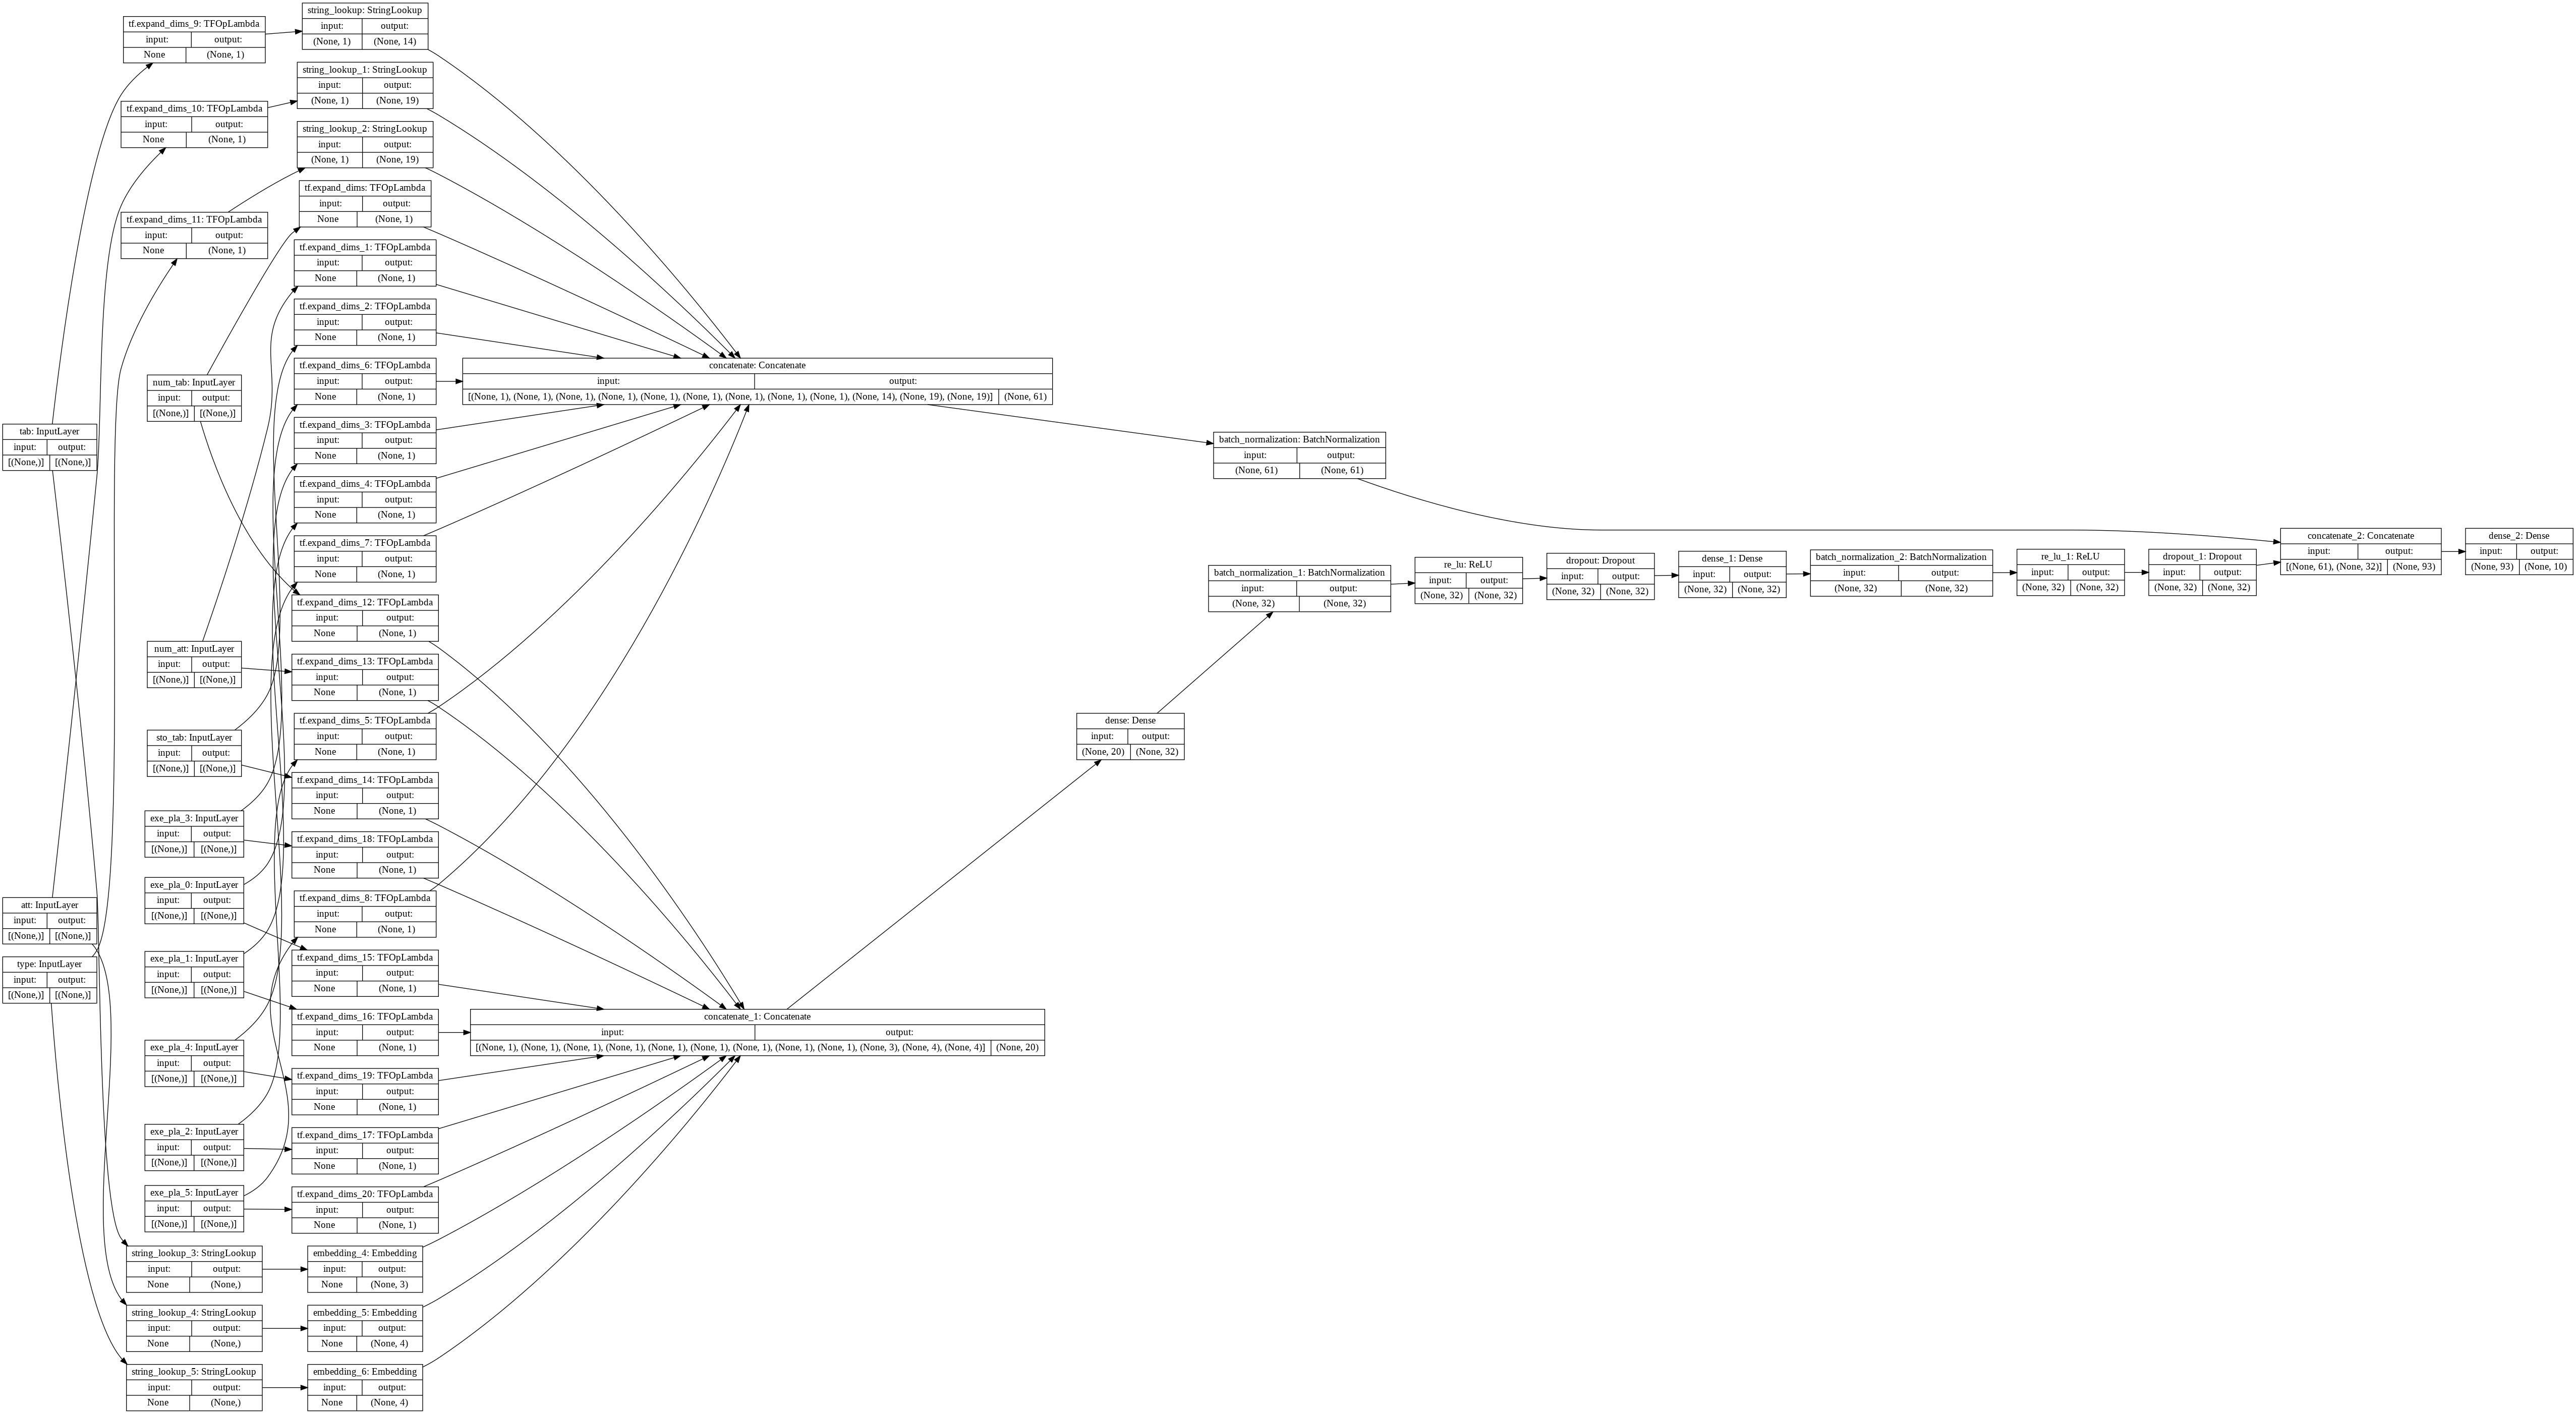

In [65]:
wide_and_deep_model = create_wide_and_deep_model()
keras.utils.plot_model(wide_and_deep_model, show_shapes=True, rankdir="LR")

In [66]:
run_experiment(wide_and_deep_model)

Start training the model...
Epoch 1/50
27/27 [==============================] - 2s 7ms/step - loss: 2.2200 - sparse_categorical_accuracy: 0.3473
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 1.5776 - sparse_categorical_accuracy: 0.5128
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 1.3152 - sparse_categorical_accuracy: 0.5638
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 1.1571 - sparse_categorical_accuracy: 0.5968
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 1.0637 - sparse_categorical_accuracy: 0.6101
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 1.0040 - sparse_categorical_accuracy: 0.6306
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.9493 - sparse_categorical_accuracy: 0.6344
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 0.9178 - sparse_categorical_accuracy: 0.6407
Epoch 9/50
27/27 [==================

## Deep & Cross

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='concatenate_3/concat:0', description="created by layer 'concatenate_3'")


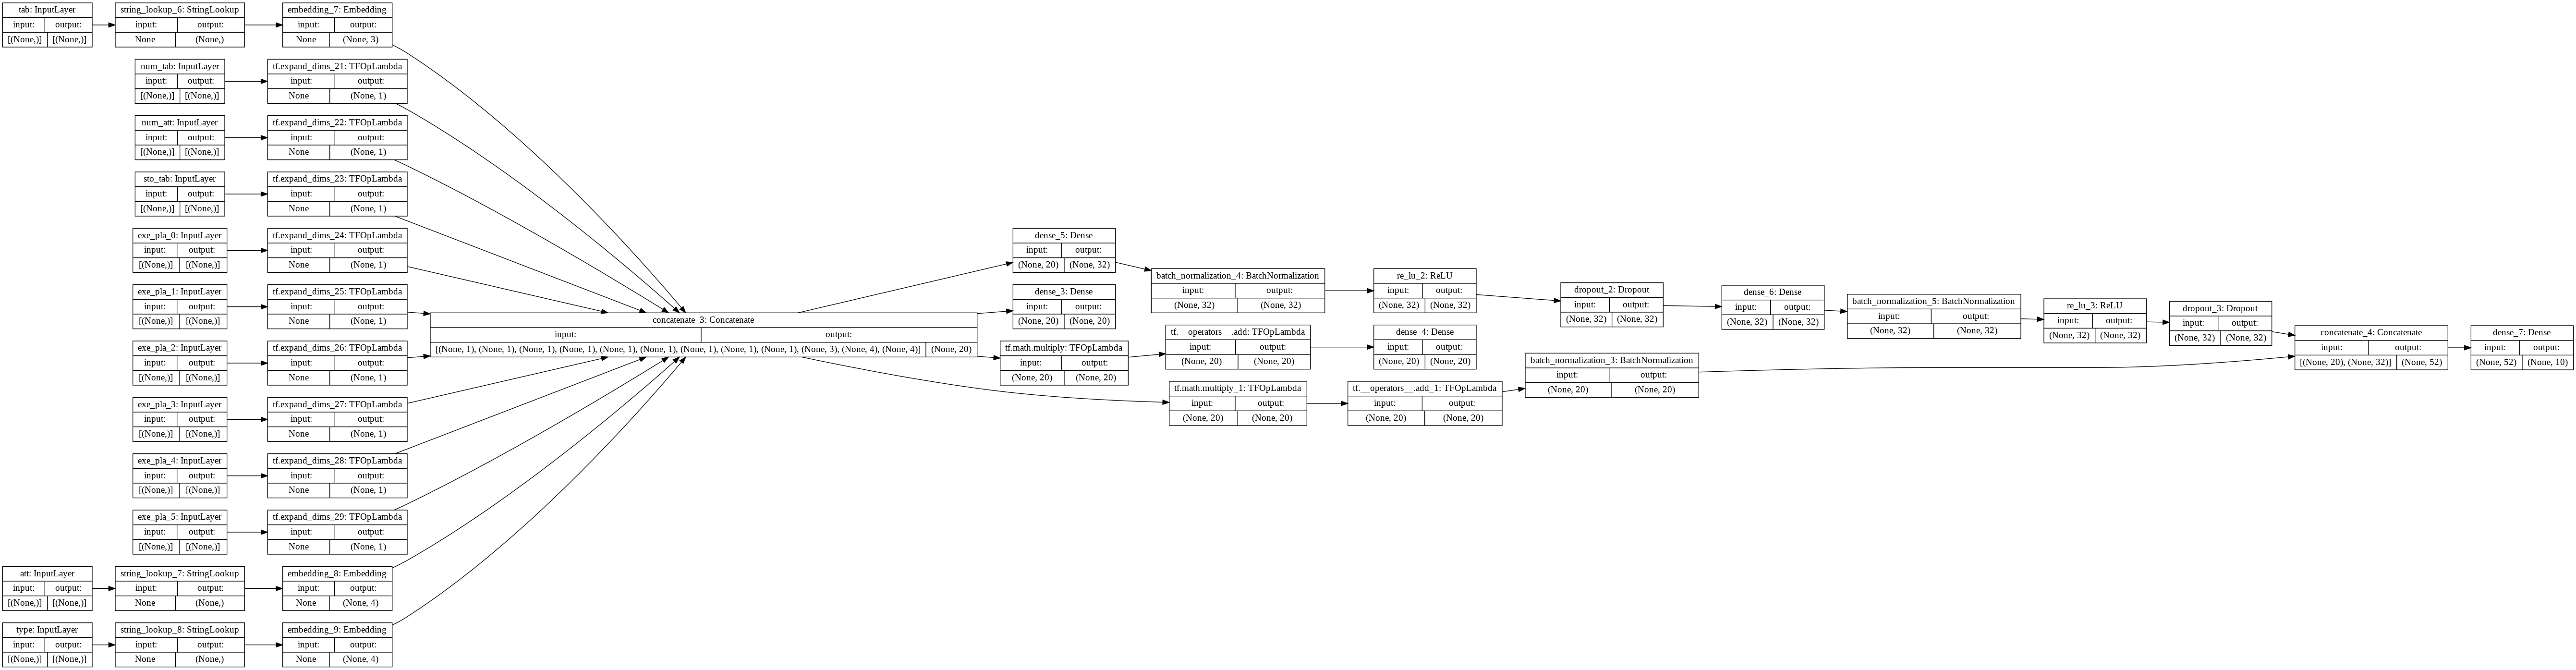

In [67]:

def create_deep_and_cross_model():

    inputs = create_model_inputs()
    x0 = encode_inputs(inputs, use_embedding=True)

    cross = x0
    for _ in hidden_units:
        units = cross.shape[-1]
        x = layers.Dense(units)(cross)
        cross = x0 * x + cross
    cross = layers.BatchNormalization()(cross)

    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([cross, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


deep_and_cross_model = create_deep_and_cross_model()
keras.utils.plot_model(deep_and_cross_model, show_shapes=True, rankdir="LR")

In [68]:
run_experiment(deep_and_cross_model)

Start training the model...
Epoch 1/50
27/27 [==============================] - 2s 5ms/step - loss: 2.0064 - sparse_categorical_accuracy: 0.2425
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 1.5011 - sparse_categorical_accuracy: 0.4661
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 1.3158 - sparse_categorical_accuracy: 0.5474
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 1.2672 - sparse_categorical_accuracy: 0.5591
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 1.1901 - sparse_categorical_accuracy: 0.5830
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 1.1363 - sparse_categorical_accuracy: 0.5929
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 1.0870 - sparse_categorical_accuracy: 0.6017
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 1.0663 - sparse_categorical_accuracy: 0.6151
Epoch 9/50
27/27 [==================